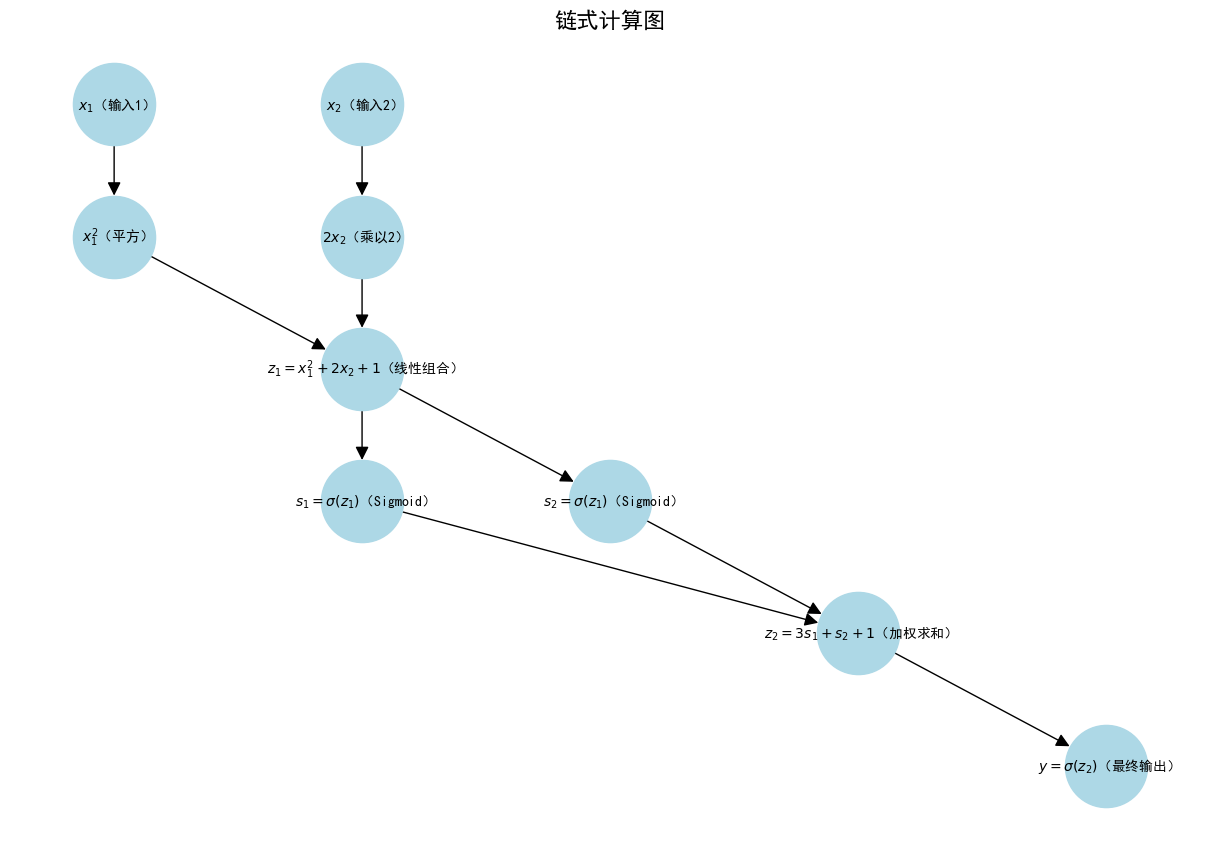

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

# 设置 Matplotlib 中文字体支持
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建有向图
G = nx.DiGraph()

# 添加节点
# 输入层
G.add_node("$x_1$（输入1）", pos=(0, 3))
G.add_node("$x_2$（输入2）", pos=(1, 3))

# 中间层 - 第一步计算 x1平方和 2x2
G.add_node("$x_1^2$（平方）", pos=(0, 2))
G.add_node("$2x_2$（乘以2）", pos=(1, 2))

# 线性组合
G.add_node("$z_1=x_1^2 + 2x_2 + 1$（线性组合）", pos=(1, 1))

# Sigmoid 激活函数的应用
G.add_node("$s_1 = \sigma(z_1)$（Sigmoid）", pos=(1, 0))

# 第二次Sigmoid
G.add_node("$s_2 = \sigma(z_1)$（Sigmoid）", pos=(2, 0))

# 加权求和
G.add_node("$z_2 = 3s_1 + s_2 + 1$（加权求和）", pos=(3, -1))

# 输出层
G.add_node("$y = \sigma(z_2)$（最终输出）", pos=(4, -2))

# 添加边
# 输入层到中间层
G.add_edge("$x_1$（输入1）", "$x_1^2$（平方）")
G.add_edge("$x_2$（输入2）", "$2x_2$（乘以2）")
G.add_edge("$x_1^2$（平方）", "$z_1=x_1^2 + 2x_2 + 1$（线性组合）")
G.add_edge("$2x_2$（乘以2）", "$z_1=x_1^2 + 2x_2 + 1$（线性组合）")

# 中间层到 Sigmoid 层
G.add_edge("$z_1=x_1^2 + 2x_2 + 1$（线性组合）", "$s_1 = \sigma(z_1)$（Sigmoid）")
G.add_edge("$z_1=x_1^2 + 2x_2 + 1$（线性组合）", "$s_2 = \sigma(z_1)$（Sigmoid）")

# Sigmoid 层到加权求和
G.add_edge("$s_1 = \sigma(z_1)$（Sigmoid）", "$z_2 = 3s_1 + s_2 + 1$（加权求和）")
G.add_edge("$s_2 = \sigma(z_1)$（Sigmoid）", "$z_2 = 3s_1 + s_2 + 1$（加权求和）")

# 加权求和到最终输出
G.add_edge("$z_2 = 3s_1 + s_2 + 1$（加权求和）", "$y = \sigma(z_2)$（最终输出）")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制计算图
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos, with_labels=True, node_size=3500, 
    node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20,
    edge_color="black"
)

# 设置标题
plt.title("链式计算图", fontsize=16)
plt.show()

In [8]:
import torch

# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 定义函数
def f(x1, x2):
    term1 = 3 * sigmoid(x1**2 + 2*x2 + 1)
    term2 = sigmoid(x1**2 + 2*x2 + 1)
    return sigmoid(term1) + term2 + 1

# 设置 x1 和 x2 的值
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# 计算函数值
y = f(x1, x2)

# 计算梯度
y.backward()

# 输出梯度
print("Gradient of y with respect to x1:", x1.grad)
print("Gradient of y with respect to x2:", x2.grad)

Gradient of y with respect to x1: tensor(0.)
Gradient of y with respect to x2: tensor(0.1043)
